<a href="https://colab.research.google.com/github/MATHONSIMM/Data-Analysis-for-some-stocks./blob/main/Data_Analysis_for_some_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
from google.colab import drive

In [ ]:
# Define the ticker symbol
tickerSymbol = 'AAPL'

# Set the start date to 5 years ago from today
start_date = datetime.datetime.now() - datetime.timedelta(days=5*365)

# Set the end date to today
end_date = datetime.datetime.now()

# Fetch the historical data
Apple_data = yf.download(tickerSymbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


## Exploratory data analysis

In [ ]:
Apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159012,103526800
2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014610,143072800
2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284161,86781200
2019-04-11,50.212502,50.250000,49.610001,49.737499,47.882233,83603200
2019-04-12,49.799999,50.035000,49.052502,49.717499,47.862976,111042800


In [ ]:
Apple_data['Adj Close'].describe()

count    1257.000000
mean      128.704056
std        44.530706
min        41.869541
25%        90.796837
50%       140.246185
75%       164.909760
max       197.857529
Name: Adj Close, dtype: float64

In [ ]:
# Reset index to make Date a column
Apple_data.reset_index(inplace=True)

### Line plot to visualize the Adj close price over time

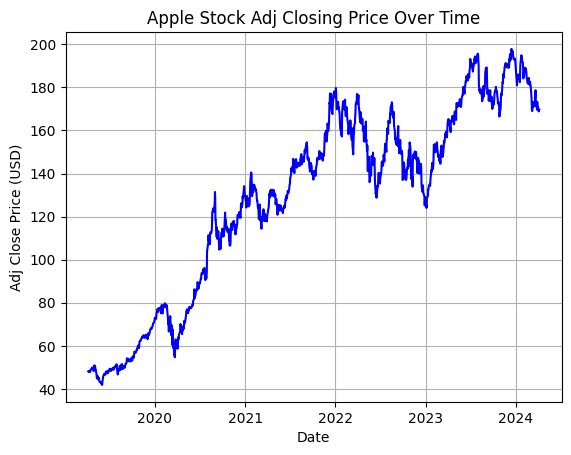

In [ ]:
plt.plot(Apple_data['Date'], Apple_data['Adj Close'], color='blue')
plt.title('Apple Stock Adj Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price (USD)')
plt.grid(True)
plt.show()

### We can obeserve the relationship between volatility and adj price trends for periods of high volatility associated with uptrends and downtrends.

### Distribution plot of daily percentage change in Adj close price

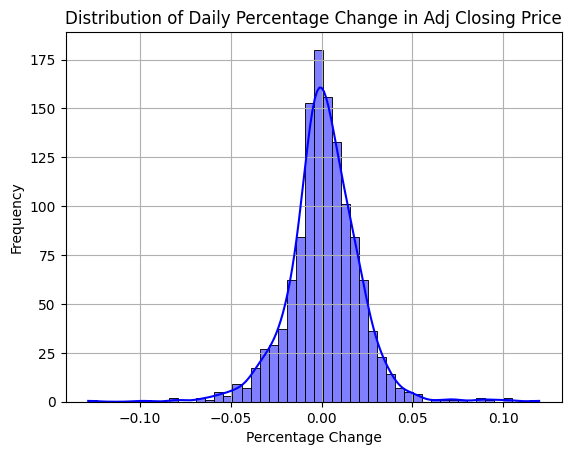

In [ ]:
# Distribution plot of daily percentage change in closing price

sns.histplot(Apple_data['Adj Close'].pct_change().dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of Daily Percentage Change in Adj Closing Price')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The daily describution of the our data almost follow the normail destribution, with the mean approximately to 0.

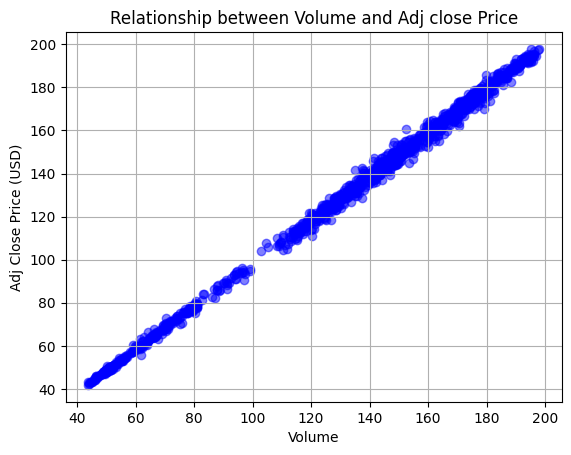

In [ ]:
# Scatter plot to visualize the relationship between volume and closing price
plt.scatter(Apple_data['Open'], Apple_data['Adj Close'], color='blue', alpha=0.5)
plt.title('Relationship between Volume and Adj close Price')
plt.xlabel('Volume')
plt.ylabel('Adj Close Price (USD)')
plt.grid(True)
plt.show()

We can obeserve the relationship between our Volume and the Adj close that a almost corelated which can help investors to predict profitable returns based on the volume.


## CREDIT CARD DEFAULTERS

Features:

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.shape

(30000, 25)

The dataset contains 30,000 rows and 25 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  object 
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There are no missing values in the data

From the above, we can see that some categorical datalike (sex, education, marriage, iD, etc) are of the data type integer

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [ ]:
#let's replace the values in education, sex and marital status as text data in for clarity

data['SEX'] = data['SEX'].replace([1,2],['male','female'])
data['EDUCATION'] = data['EDUCATION'].replace([1,2,3,4,5,6],['graduate school','university','high school','others','unknown','unknown'])
data['MARRIAGE'] = data['MARRIAGE'].replace([1,2,3],['married','single','others'])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0


Determining the age distribution of credit card users and also the limit balance on their credit card

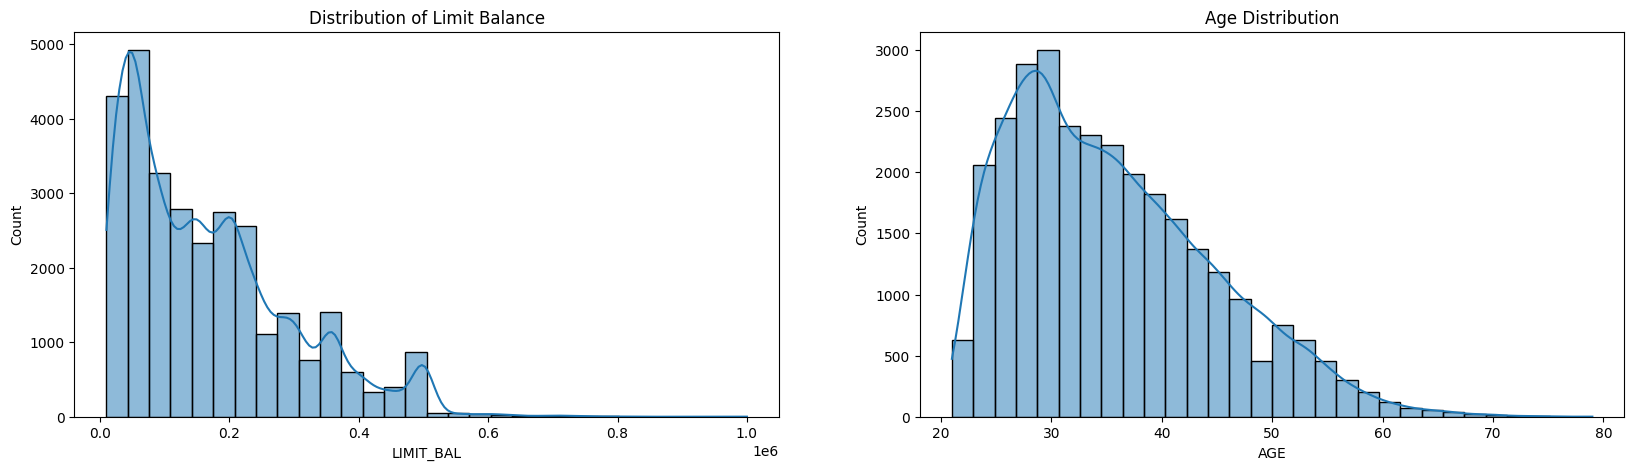

In [ ]:
# Plotting the age distribution and limit balance
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(data['LIMIT_BAL'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Limit Balance')

sns.histplot(data['AGE'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Age Distribution')

plt.show()

From the above, we observe that our cotinuous data are rightly skewed.

from the Limit balance, more users have credit limit between 0 and 20000

in the age distribution, we have more users between the age of 23-40. which are young and mddle age users

Determining the credit Limit for defaulters and Non defaulters

default.payment.next.month: Default payment (1=yes, 0=no)

In [ ]:
#let's rename the target column to default
data = data.rename(columns ={'default.payment.next.month':'DEFAULT'})
# data['DEFAULT'] = data['DEFAULT'].replace([1,0],['Yes','No'])


In [ ]:
data['DEFAULT'] = data['DEFAULT'].replace([1,0],['Yes','No'])

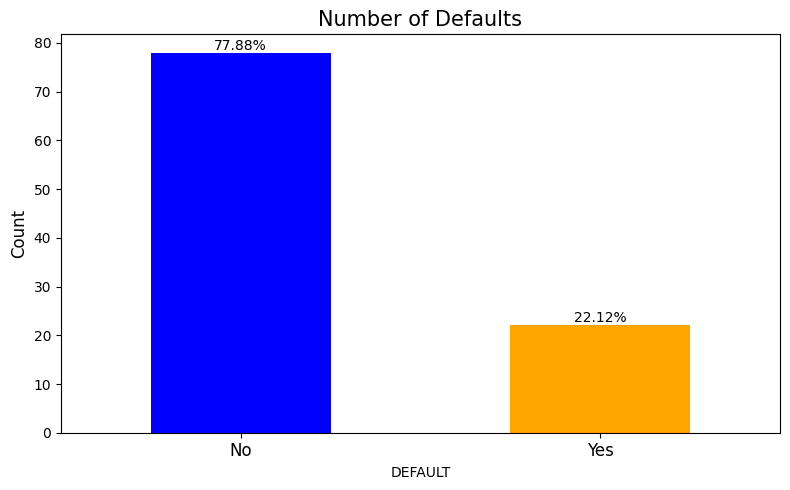

In [ ]:
default_counts = (data['DEFAULT'].value_counts(normalize=True)*100)

# Plotting the bar chart for the 'DEFAULT' column
fig, ax = plt.subplots(figsize=(8, 5))
default_counts.plot(kind='bar', ax=ax, color=['blue', 'orange'])

# Adding value labels on top of the bars
for i, value in enumerate(default_counts):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

# Setting plot features
ax.set_xticklabels(default_counts.index, rotation=0, fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Number of Defaults', fontsize=15)
plt.tight_layout()

plt.show()



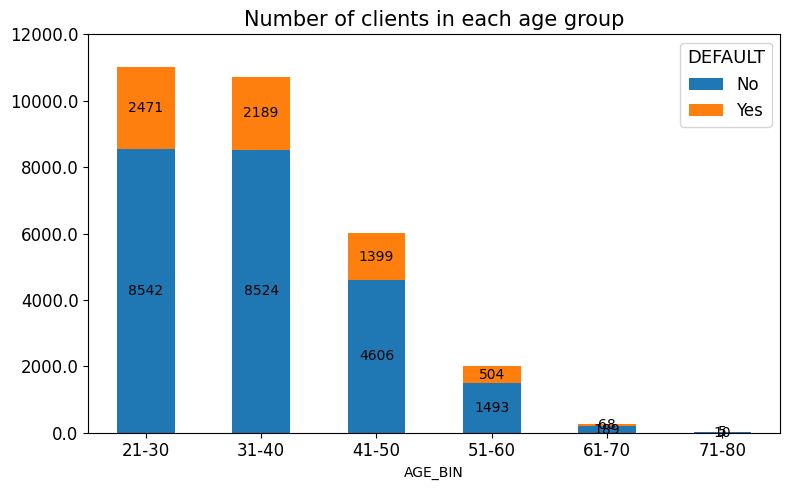

In [ ]:
#defaulters and non defaulters by age
bins = [20,30,40,50,60,70,80]
age_range = ['21-30','31-40','41-50','51-60','61-70','71-80']
data['AGE_BIN'] = pd.cut(data.AGE, bins=bins, labels=age_range, include_lowest=True)

# Calculating the counts
age_counts = data.groupby(['AGE_BIN', 'DEFAULT']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(8,5))

# Stacking bars for 'DEFAULT' categories in each age bin
age_counts.plot(kind='bar', stacked=True, ax=ax)

# Adding counts above bars
for i, (idx, row) in enumerate(age_counts.iterrows()):
    height = 0
    for default_status in age_counts.columns:
        value = row[default_status]
        ax.text(i, height + value/2, str(value), ha='center', va='center')
        height += value

# Setting plot features
ax.set_xticklabels(age_counts.index, rotation=0, fontsize=12)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_title("Number of clients in each age group", fontsize=15)
ax.legend(title='DEFAULT', fontsize=12, title_fontsize='13')
plt.tight_layout()

plt.show()

The above chart shows that users within the age of 21 and 50 are likely to default more and also from the trend we could see that users age, chances of default in credit card use is very slim

Defaulters by marital status

In [ ]:
data['MARRIAGE'].value_counts()

MARRIAGE
single     15964
married    13659
others       377
Name: count, dtype: int64

In [ ]:
data['MARRIAGE'] = data['MARRIAGE'].replace([0],['others'])

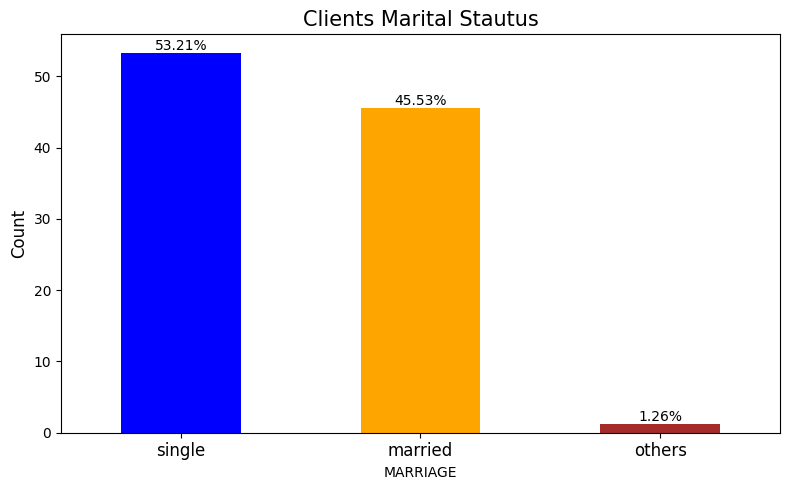

In [ ]:
default_counts = (data['MARRIAGE'].value_counts(normalize=True) * 100)

# Plotting the bar chart for the 'DEFAULT' column
fig, ax = plt.subplots(figsize=(8, 5))
default_counts.plot(kind='bar', ax=ax, color=['blue', 'orange', 'brown'])

# Adding value labels on top of the bars
for i, value in enumerate(default_counts):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

# Setting plot features
ax.set_xticklabels(default_counts.index, rotation=0, fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Clients Marital Stautus', fontsize=15)
plt.tight_layout()

plt.show()

The chart aove shows that 53% of credit card users are single, 45.5% are married.

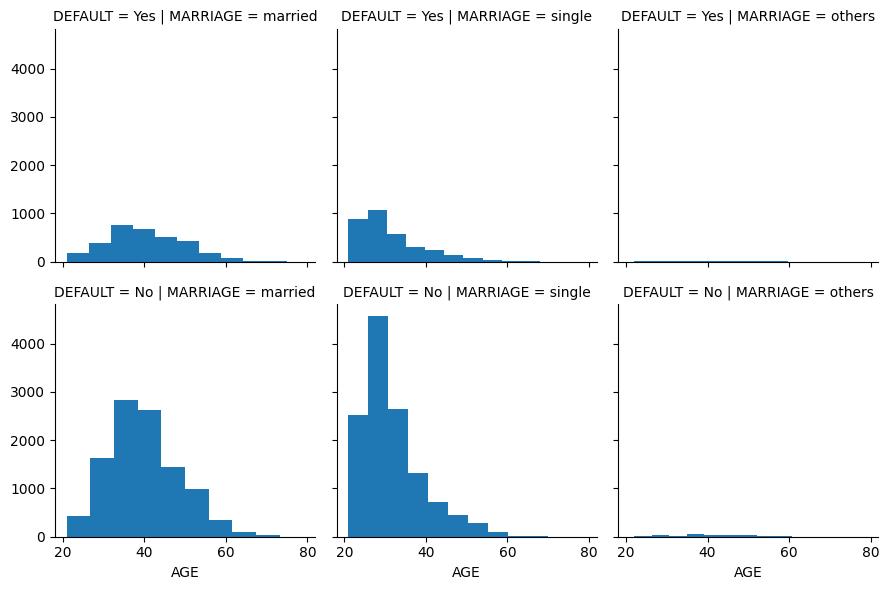

In [ ]:
g = sns.FacetGrid(data, row='DEFAULT', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

The chart shows that clients who are single and between the age of 20 and 40 are likely to default more

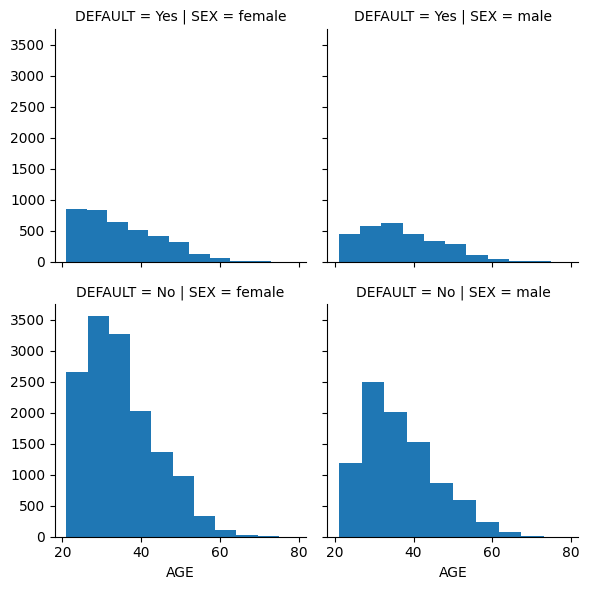

In [ ]:
g = sns.FacetGrid(data, row='DEFAULT', col='SEX')
g = g.map(plt.hist, 'AGE')

Female within the age range of 20 and 40 will defuault more than the male

## Checking How Education Level can affect Deault

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  object  
 3   EDUCATION  30000 non-null  object  
 4   MARRIAGE   30000 non-null  object  
 5   AGE        30000 non-null  int64   
 6   PAY_0      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null  flo

In [ ]:
data['EDUCATION'] = data['EDUCATION'].replace([0],['others'])

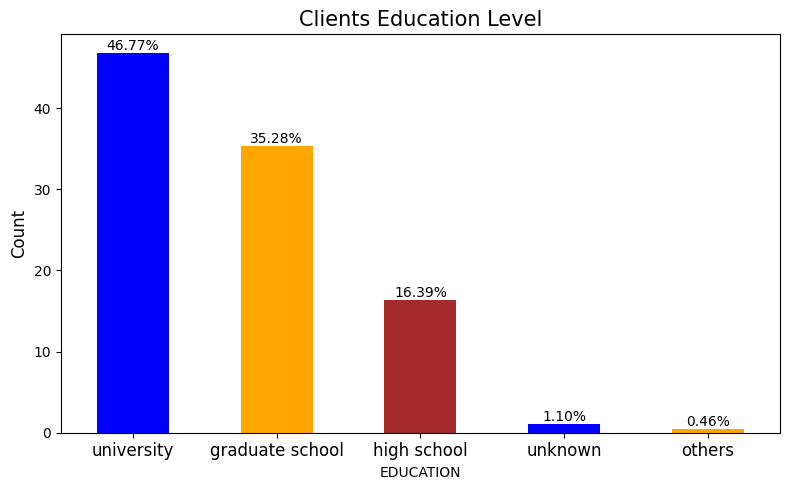

In [ ]:
default_counts = (data['EDUCATION'].value_counts(normalize=True) * 100)

# Plotting the bar chart for the 'DEFAULT' column
fig, ax = plt.subplots(figsize=(8, 5))
default_counts.plot(kind='bar', ax=ax, color=['blue', 'orange', 'brown',])

# Adding value labels on top of the bars
for i, value in enumerate(default_counts):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

# Setting plot features
ax.set_xticklabels(default_counts.index, rotation=0, fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Clients Education Level', fontsize=15)
plt.tight_layout()

plt.show()

The chart above shows that the users of credit cards are university(46%), graduate school(35%) and high school(16%)

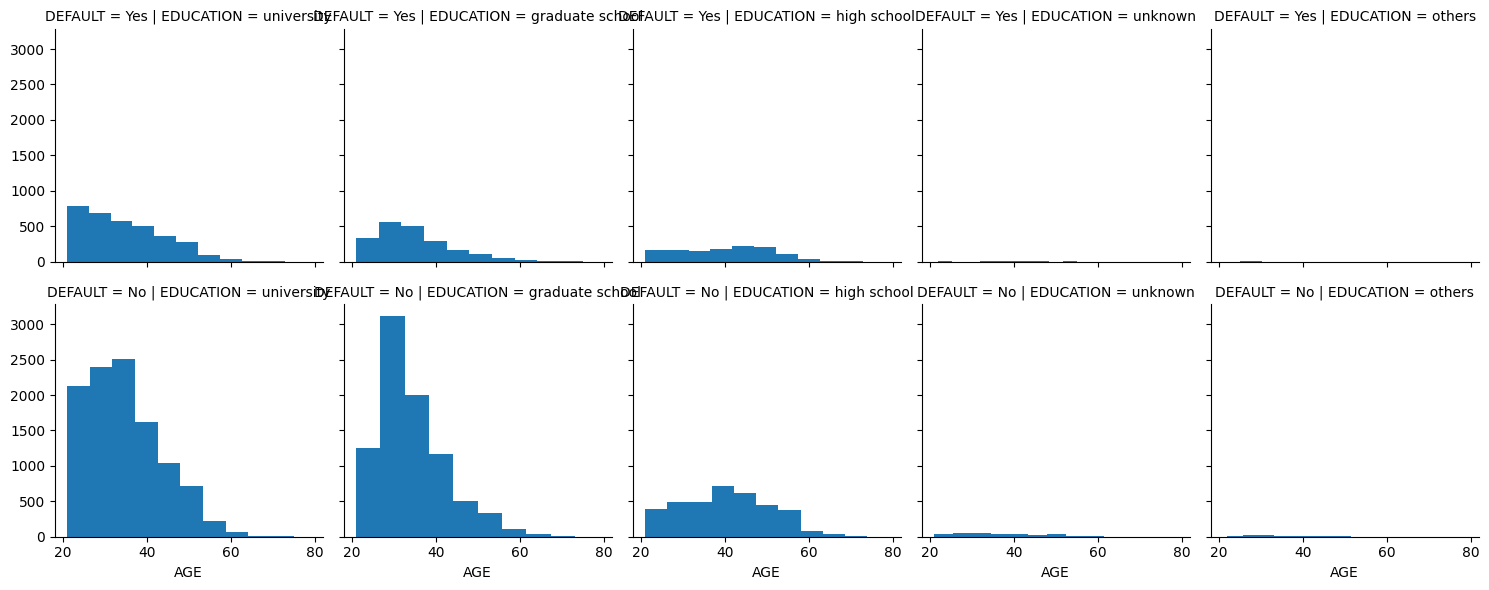

In [ ]:
g = sns.FacetGrid(data, row='DEFAULT', col='EDUCATION')
g = g.map(plt.hist, 'AGE')

University and graduate school users witin the age of 20 and 40 are likely to dafault in their payment

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

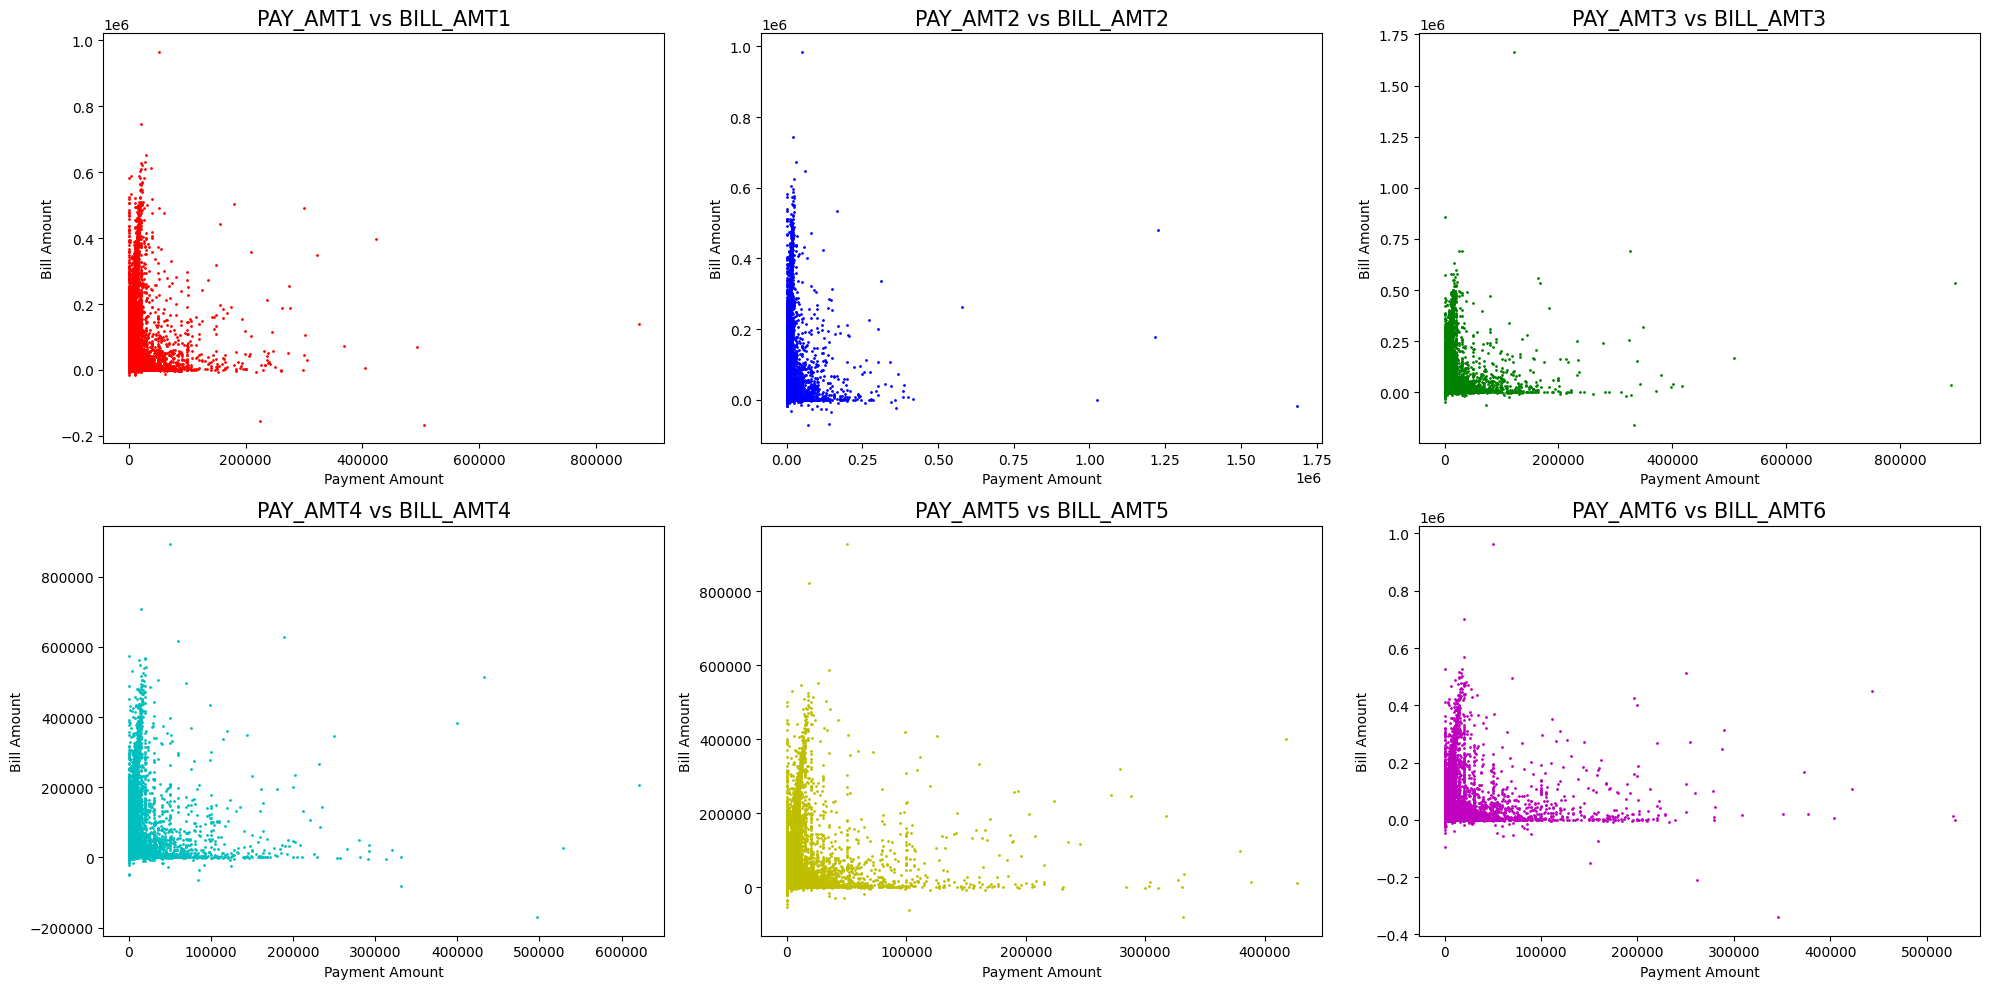

In [ ]:
# Creating subplots with a specified figure size.
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# A list of colors for the scatter plots.
colors = ['r', 'b', 'g', 'c', 'y', 'm']

# Looping over the range of months (1 to 6) to create scatter plots.
for i in range(6):
    ax = axes[i//3, i%3]  # Selecting the right subplot.
    ax.scatter(
        x=data[f'PAY_AMT{i+1}'],
        y=data[f'BILL_AMT{i+1}'],
        c=colors[i],
        s=1
    )
    ax.set_title(f'PAY_AMT{i+1} vs BILL_AMT{i+1}', fontsize=15)  # Adding a title to each subplot.

# Setting the common X and Y labels.
for ax in axes.flat:
    ax.set(xlabel='Payment Amount', ylabel='Bill Amount')

# Adjusting layout to prevent overlapping.
plt.tight_layout()

# Show the plot.
plt.show()

The plot suggests a significant number of clients have a large bill amount while their corresponding payments are minimal. This inference is drawn from the dense clustering of data points near the Y-axis and close to the zero point on the X-axis

 ## Moody's Seasoned Aaa Corporate Bond Yield (DAAA)

In [ ]:
pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
bond_data = pd.read_csv('/workspaces/codespaces-jupyter/data/DAAA.csv')

## Exploratory Data Analysis

In [ ]:
# Display the first few rows of the dataset
print(bond_data.head())

# Get a concise summary of the dataframe
print(bond_data.info())

# Check for missing values in each column
print(bond_data.isnull().sum())

        DATE  DAAA
0   4/3/2023  4.35
1   4/4/2023  4.41
2   4/5/2023  4.38
3   4/6/2023  4.36
4  4/10/2023  4.45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    250 non-null    object 
 1   DAAA    250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB
None
DATE    0
DAAA    0
dtype: int64


count    250.000000
mean       4.926440
std        0.321298
min        4.350000
25%        4.670000
50%        4.915000
75%        5.077500
max        5.800000
Name: DAAA, dtype: float64


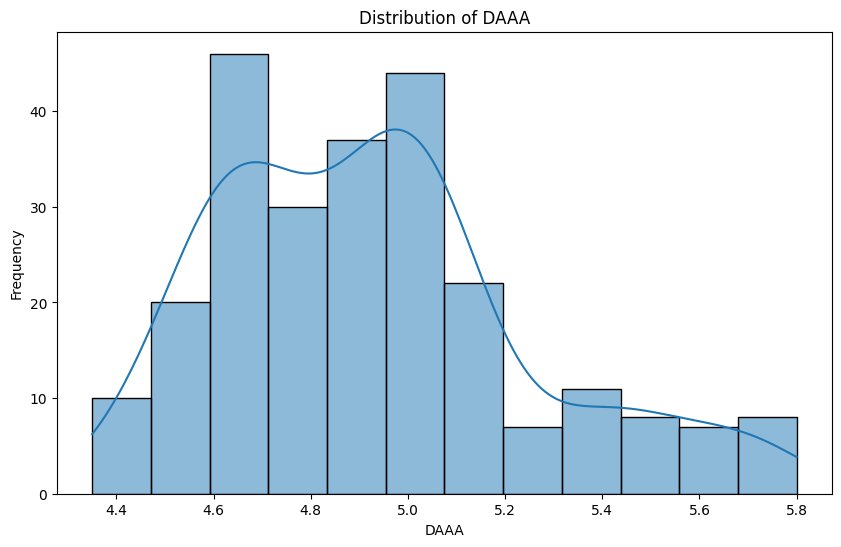

In [ ]:
# Summary statistics for 'DAAA'
print(bond_data['DAAA'].describe())

# Distribution plot for 'DAAA'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(bond_data['DAAA'], kde=True)
plt.title('Distribution of DAAA')
plt.xlabel('DAAA')
plt.ylabel('Frequency')
plt.show()

The histogram reveals a concentration of yields around the mean of 4.93%, with a standard deviation of 0.32%.
The relatively tight spread of yields around the mean value suggests a stable bond market environment during the observed period, with limited extreme volatility in yields.

Time Series Analysis

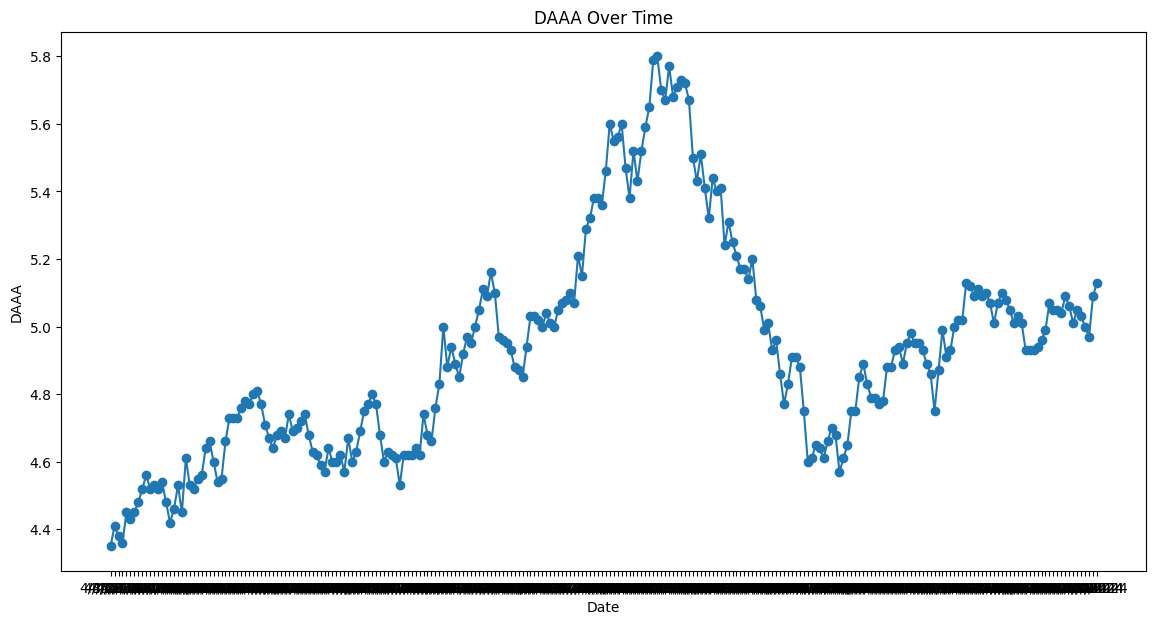

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(bond_data['DATE'], bond_data['DAAA'], marker='o', linestyle='-')
plt.title('DAAA Over Time')
plt.xlabel('Date')
plt.ylabel('DAAA')
plt.show()

The DAAA yield exhibited modest fluctuations over the observed period, hinting at a market that, while responsive to short-term economic indicators, remained relatively stable overall.

Text(0.5, 1.0, 'Box Plot of DAAA')

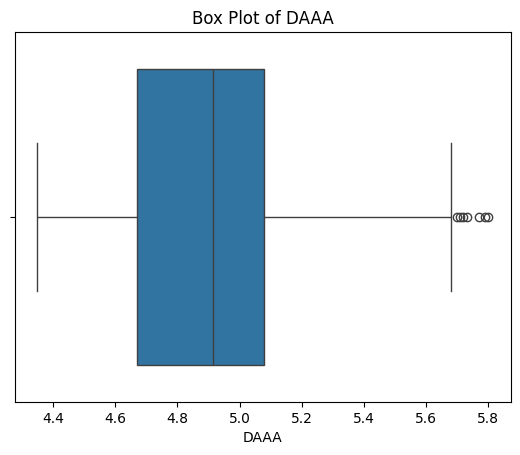

In [ ]:
sns.boxplot(x=bond_data['DAAA'])
plt.title('Box Plot of DAAA')

The presence of outliers in the DAAA yield data points to occasional market events or shocks that led to atypical yield rates, warranting further investigation to understand their causes and implications.